# Song Recommendations

## Imports and taking peek at the data

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score
from scipy.stats import chi2_contingency
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import itertools
import numpy as np
import pandas as pd 
import math
from scipy import stats
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Clean Base of Songs.csv')
df.head()

,Unnamed: 0,id,Title,Artist(s),Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,BPM,Time_Signature,Valence
0,0,1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,The KLF,0.0158,0.617,216270,0.872,0.112000,8.0,0.4080,-12.305,1.0,0.0480,111.458,4.0,0.504
1,1,6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),Pitbull,0.0142,0.825,237120,0.743,0.000021,2.0,0.2370,-5.995,1.0,0.1490,127.045,4.0,0.800
2,2,70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,Britney Spears,0.5600,0.677,312533,0.665,0.000001,7.0,0.3380,-5.171,1.0,0.0305,74.981,4.0,0.706
3,3,1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,The Kinks,0.5680,0.683,233400,0.728,0.000051,9.0,0.0384,-8.920,1.0,0.2590,75.311,4.0,0.833
4,4,72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,The Rolling Stones,0.6750,0.319,448720,0.627,0.000073,0.0,0.2890,-9.611,1.0,0.0687,85.818,4.0,0.497


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148120 entries, 0 to 1148119
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1148120 non-null  int64  
 1   id                1148120 non-null  object 
 2   Title             1148120 non-null  object 
 3   Artist(s)         1148095 non-null  object 
 4   Acousticness      1148120 non-null  float64
 5   Danceability      1148120 non-null  float64
 6   Duration (ms)     1148120 non-null  int64  
 7   Energy            1148120 non-null  float64
 8   Instrumentalness  1148120 non-null  float64
 9   Key               1148120 non-null  float64
 10  Liveness          1148120 non-null  float64
 11  Loudness          1148120 non-null  float64
 12  Mode              1148120 non-null  float64
 13  Speechiness       1148120 non-null  float64
 14  BPM               1148120 non-null  float64
 15  Time_Signature    1148120 non-null  float64
 16  

### Dropping usless column

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148120 entries, 0 to 1148119
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1148120 non-null  object 
 1   Title             1148120 non-null  object 
 2   Artist(s)         1148095 non-null  object 
 3   Acousticness      1148120 non-null  float64
 4   Danceability      1148120 non-null  float64
 5   Duration (ms)     1148120 non-null  int64  
 6   Energy            1148120 non-null  float64
 7   Instrumentalness  1148120 non-null  float64
 8   Key               1148120 non-null  float64
 9   Liveness          1148120 non-null  float64
 10  Loudness          1148120 non-null  float64
 11  Mode              1148120 non-null  float64
 12  Speechiness       1148120 non-null  float64
 13  BPM               1148120 non-null  float64
 14  Time_Signature    1148120 non-null  float64
 15  Valence           1148120 non-null  float64
dtype

### Let's load the user's liked songs

In [5]:
df_user_b = pd.read_csv('Ever Liked.csv')
df_user_b.head()

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Speech,Live,Loud (db),Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,ISRC
0,1,Con Te Partirò,Andrea Bocelli,33,102,"classical tenor, italian tenor, operatic pop","Classical, Pop",Romanza (Remastered),1996-01-01,04:11,...,0,0,-8,G Major,4,2023-01-29,6T720JbJdg8lB5kqfvh5mk,Universal Music Group International,9B,ITZ049700077
1,2,Roll Northumbria,The Dreadnoughts,44,180,"celtic rock, pirate, shanty, vancouver punk","Rock, Metal, World/Traditional",Into the North,2019-11-15,03:49,...,0,10,-9,B Minor,3,2023-01-29,1NC8EvzidMu9cW03zMgZln,Stomp Records,10A,CASE11900085
2,3,Holiday Road - National Lampoon's Vacation,Lindsey Buckingham,52,189,classic rock,Rock,Holiday Road,1983-00-00,02:11,...,0,70,-14,F Major,4,2023-01-29,38i0QcGQ9hu8PMk4QObUTj,Rhino/Warner Records,7B,USRE10901266
3,4,Starman - 2012 Remaster,David Bowie,78,100,"art rock, classic rock, glam rock, permanent w...",Rock,The Rise and Fall of Ziggy Stardust and the Sp...,1972-06-06,04:14,...,0,50,-10,F Major,4,2023-01-29,0pQskrTITgmCMyr85tb9qq,Parlophone UK,7B,USJT11200004
4,5,Follow God,Kanye West,72,180,"chicago rap, hip hop, rap",Hip Hop,JESUS IS KING,2019-10-25,01:44,...,40,0,-4,C♯/D♭ Major,4,2023-01-29,2QpGZOhTCHHiKmpSO9FW4h,Getting Out Our Dreams II / Def Jam Recordings,3B,USUM71920463


In [6]:
df_user_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 1462 non-null   int64 
 1   Song              1462 non-null   object
 2   Artist            1462 non-null   object
 3   Popularity        1462 non-null   int64 
 4   BPM               1462 non-null   int64 
 5   Genres            1419 non-null   object
 6   Parent Genres     1415 non-null   object
 7   Album             1462 non-null   object
 8   Album Date        1462 non-null   object
 9   Time              1462 non-null   object
 10  Dance             1462 non-null   int64 
 11  Energy            1462 non-null   int64 
 12  Acoustic          1462 non-null   int64 
 13  Instrumental      1462 non-null   int64 
 14  Happy             1462 non-null   int64 
 15  Speech            1462 non-null   int64 
 16  Live              1462 non-null   int64 
 17  Loud (db)     

### Loding the user's liked song into our db

In [7]:
df['user_b'] = df['id'].isin(df_user_b['Spotify Track Id'])
df

,id,Title,Artist(s),Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,BPM,Time_Signature,Valence,user_b
0,1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,The KLF,0.01580,0.61700,216270,0.872,0.112000,8.0,0.4080,-12.305,1.0,0.0480,111.458,4.0,0.504,False
1,6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),Pitbull,0.01420,0.82500,237120,0.743,0.000021,2.0,0.2370,-5.995,1.0,0.1490,127.045,4.0,0.800,False
2,70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,Britney Spears,0.56000,0.67700,312533,0.665,0.000001,7.0,0.3380,-5.171,1.0,0.0305,74.981,4.0,0.706,False
3,1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,The Kinks,0.56800,0.68300,233400,0.728,0.000051,9.0,0.0384,-8.920,1.0,0.2590,75.311,4.0,0.833,False
4,72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,The Rolling Stones,0.67500,0.31900,448720,0.627,0.000073,0.0,0.2890,-9.611,1.0,0.0687,85.818,4.0,0.497,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148115,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,FVLCRVM,0.00935,0.00935,276213,0.966,0.002240,5.0,0.3370,-6.970,0.0,0.0672,159.586,4.0,0.415,False
1148116,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,FVLCRVM,0.10400,0.10400,363179,0.701,0.644000,11.0,0.0749,-6.602,0.0,0.0883,121.980,4.0,0.781,False
1148117,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,FVLCRVM,0.03040,0.03040,385335,0.796,0.918000,9.0,0.0664,-5.960,0.0,0.0564,121.996,4.0,0.467,False
1148118,37B4SXC8uoBsUyKCWnhPfX,Yummy!,FVLCRVM,0.00007,0.00007,324455,0.856,0.776000,6.0,0.1170,-6.788,0.0,0.0409,124.986,4.0,0.227,False


### Let's look at correlation

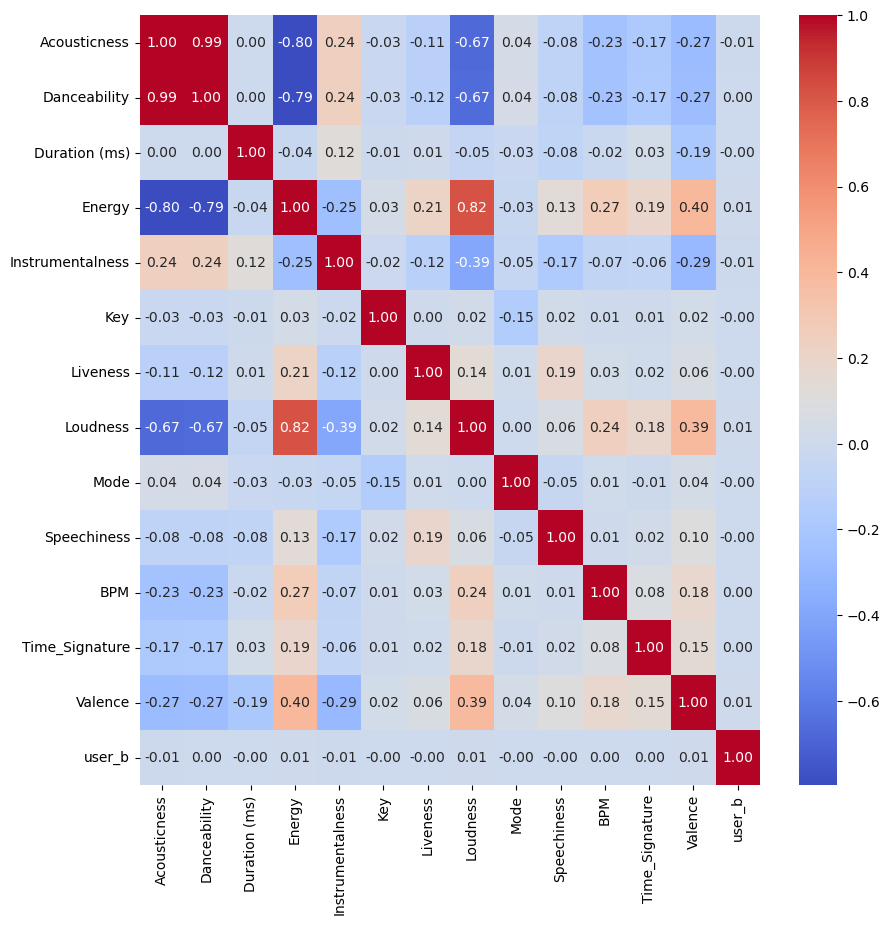

In [8]:
metrics = df.drop(['id', 'Title', 'Artist(s)'], axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(metrics.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

### Drop Acousticness because it's too much like Danceability

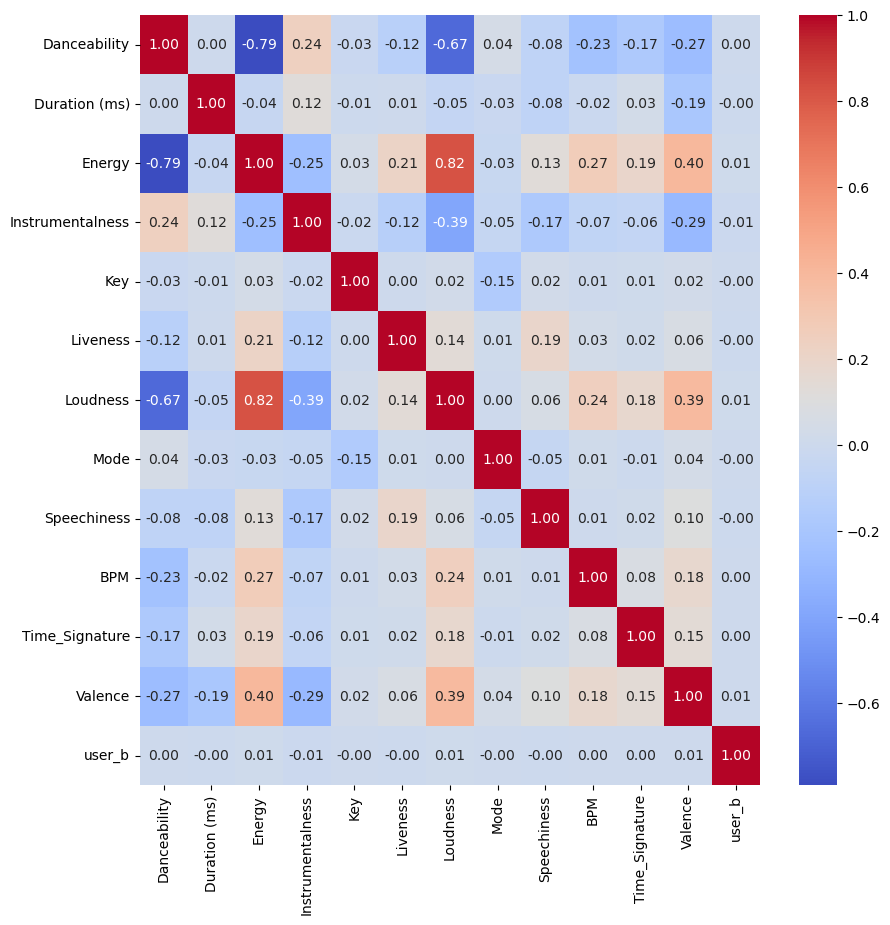

In [9]:
metrics.drop('Acousticness', axis=1, inplace=True)
plt.figure(figsize=(10, 10))
sns.heatmap(metrics.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

# Business Questions
### Given over 1 million songs and a user’s input of like songs, can we recommend new songs that are not on this list?
### Can we also do it quickly, incase we need to train and produce new data as soon as possible?

## Let's get PCAs to find cluster's to visualize

In [10]:
metrics.drop('user_b', axis=1, inplace=True)
pca = PCA(n_components=2)
ss = StandardScaler()
metrics_ss = ss.fit_transform(metrics)
pca_metrics = pca.fit_transform(metrics_ss)
pca_df = pd.DataFrame(pca_metrics, columns=['PCA1','PCA2'])
pca_df['id'] = df['id']
pca_df

,PCA1,PCA2,id
0,0.783144,0.497258,1XAZlnVtthcDZt2NI1Dtxo
1,1.203253,1.073413,6a8GbQIlV8HBUW3c6Uk9PH
2,0.806725,0.557078,70XtWbcVZcpaOddJftMcVi
3,0.831133,1.372534,1NXUWyPJk5kO6DQJ5t7bDu
4,0.564933,0.028491,72WZtWs6V7uu3aMgMmEkYe
...,...,...,...
1148115,2.275690,-0.813025,0EsMifwUmMfJZxzoMPXJKZ
1148116,1.261598,-1.501088,2WSc2TB1CSJgGE0PEzVeiu
1148117,0.924089,-2.309555,6iProIgUe3ETpO6UT0v5Hg
1148118,0.872411,-2.144072,37B4SXC8uoBsUyKCWnhPfX


In [11]:
metrics_ss = pd.DataFrame(metrics_ss, columns=metrics.columns)

### Let's look at the densitiy to find the best amount of clusters

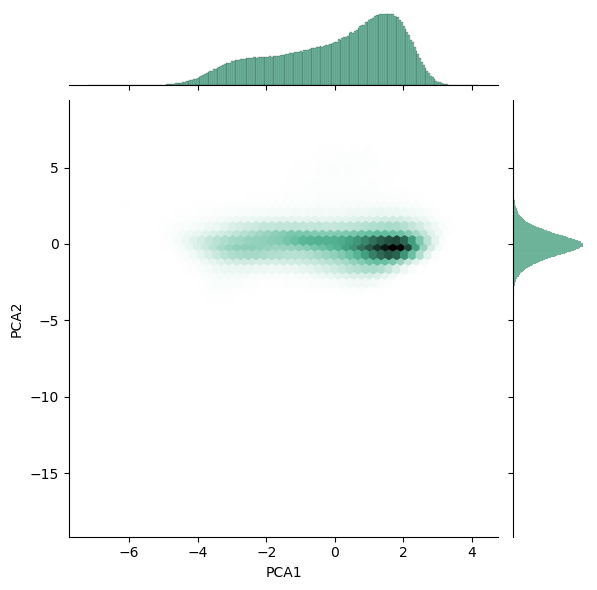

In [12]:
sns.jointplot(x = 'PCA1', y = 'PCA2', kind="hex", data = pca_df, color="#4CB391")

### Let's use 3 clusters based on this plot

In [13]:
X = pca_df[['PCA1', 'PCA2']]
base_gmm = GaussianMixture(n_components=3)
pca_df['Cluster GMM #'] = base_gmm.fit_predict(X)
pca_df

  File "C:\Users\pie14\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\pie14\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pie14\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\pie14\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


,PCA1,PCA2,id,Cluster GMM #
0,0.783144,0.497258,1XAZlnVtthcDZt2NI1Dtxo,1
1,1.203253,1.073413,6a8GbQIlV8HBUW3c6Uk9PH,1
2,0.806725,0.557078,70XtWbcVZcpaOddJftMcVi,1
3,0.831133,1.372534,1NXUWyPJk5kO6DQJ5t7bDu,1
4,0.564933,0.028491,72WZtWs6V7uu3aMgMmEkYe,1
...,...,...,...,...
1148115,2.275690,-0.813025,0EsMifwUmMfJZxzoMPXJKZ,1
1148116,1.261598,-1.501088,2WSc2TB1CSJgGE0PEzVeiu,1
1148117,0.924089,-2.309555,6iProIgUe3ETpO6UT0v5Hg,1
1148118,0.872411,-2.144072,37B4SXC8uoBsUyKCWnhPfX,1


### Let's use GMM to cluster our data

Text(0.5, 1.0, 'Base GMM Cluster')

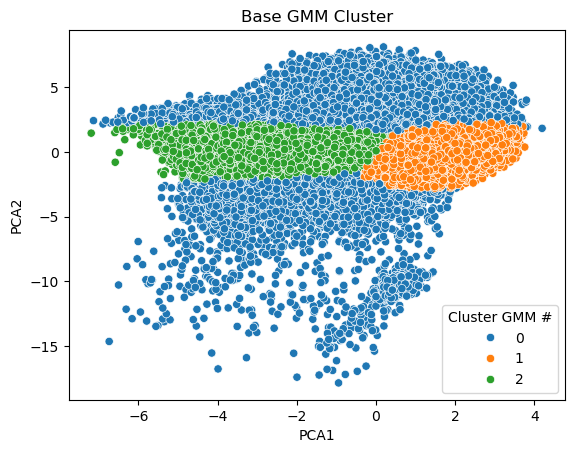

In [14]:
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Cluster GMM #', palette=sns.color_palette('tab10', n_colors= 15), data =pca_df).set_title("Base GMM Cluster")

### Mapping the user's data over the cluster 

Text(0.5, 1.0, 'Base GMM Cluster With User')

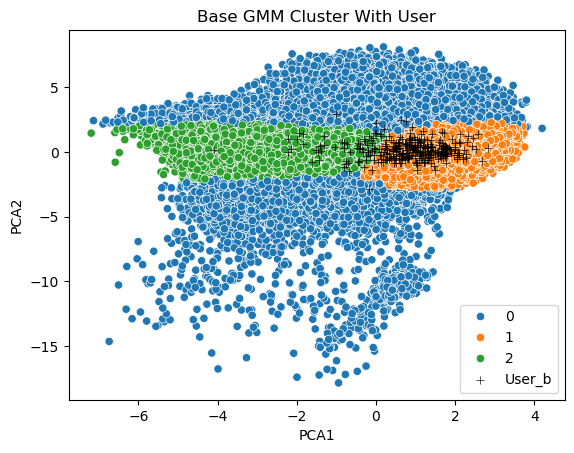

In [15]:
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Cluster GMM #', palette=sns.color_palette('tab10', n_colors= 15), data =pca_df)
sns.scatterplot(x = 'PCA1', y = 'PCA2', color='black', data =pca_df[pca_df['id'].isin(df_user_b['Spotify Track Id'])], label='User_b', marker='+').set_title("Base GMM Cluster With User")

### Let's find how many K-Neighbors we should find from each cluster  

In [16]:
user_b = pca_df[pca_df['id'].isin(df_user_b['Spotify Track Id'])]
non_b =  pca_df[~pca_df['id'].isin(df_user_b['Spotify Track Id'])]
user_b_by_cluster = [user_b[user_b['Cluster GMM #'] == i] for i in sorted(user_b['Cluster GMM #'].unique())]
non_b_by_cluster = [non_b[non_b['Cluster GMM #'] == i] for i in sorted(non_b['Cluster GMM #'].unique())]
user_b_percent = [len(df)*len(user_b_by_cluster[i]) / (len(non_b_by_cluster[i]) + len(user_b_by_cluster[i])) for i in range(len(user_b['Cluster GMM #'].unique()))]
user_b_percent

[140.66404130567952, 480.34428080283215, 145.75317588735498]

### The Model

In [17]:
playlist = []
for i in range(len(user_b_by_cluster)):
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(non_b_by_cluster[i][['PCA1','PCA2']])
    playlist.append(model_knn.kneighbors(user_b_by_cluster[i][['PCA1','PCA2']].values.reshape(-1, 2), n_neighbors=math.floor(user_b_percent[i])))

### Find the samllest K-Neighbors proportional to the user’s presence within each cluster.

In [18]:
results = []
i = 0
for p in playlist:
    min_eles = np.sort(p[0])[:math.floor(400*.01*user_b_percent[i])]
    for ele in min_eles:
        results.append(p[1][np.where(p[0] == ele)[0][0] , np.where(p[0] == ele)[1][0]])
    i+=1
results = list(set(results))
len(results)

323

In [19]:
perdicts_gmm_knn = df.loc[(results)]
perdicts_gmm_knn.head()

,id,Title,Artist(s),Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,BPM,Time_Signature,Valence,user_b
122882,2YVX51IgRZ3PQ3EsPHEP08,In My Song,The Redwalls,0.781000,0.781000,257067,0.85600,0.831000,9.0,0.6350,-6.431,0.0,0.0661,112.445,4.0,0.2710,False
403459,2jBrvCTs02TneEd0IDSR6d,Don Pasquale: Act I: Son rinato,"[""['Gaetano Donizetti'"", ' "" \'Roberto Abbado""]']",0.945000,0.945000,154107,0.03110,0.000000,2.0,0.4310,-22.783,1.0,0.1100,137.071,4.0,0.2160,False
53254,1fB8o0mO9hSTdFAupbD7rV,The Adventures of Robin Hood: Robin Hood Meets...,"[""['Erich Wolfgang Korngold'"", ' "" \'Moscow Sy...",0.954000,0.954000,235800,0.08020,0.883000,2.0,0.2110,-24.329,1.0,0.0472,123.312,5.0,0.1490,False
538647,2OrGfMM2HuhAc5F9SYCYoN,"Le carnaval des animaux, R. 125 (Arr. for 2 Pi...","[""['Camille Saint-Saëns'"", ' "" \'Louis Lortie""...",0.994000,0.994000,53600,0.00349,0.966000,0.0,0.1140,-32.704,0.0,0.0692,75.158,4.0,0.0944,False
352284,2miYtP2ulQEqLMvo9qH2NV,Out of Control,Vantage Point,0.000019,0.000019,299389,0.93700,0.000637,11.0,0.0719,-4.019,0.0,0.0429,130.135,4.0,0.5630,False


### TA-DA we have a playlist 

### Let's do the same using the Kmeans clustering

Text(0.5, 1.0, 'Base KMeans Cluster')

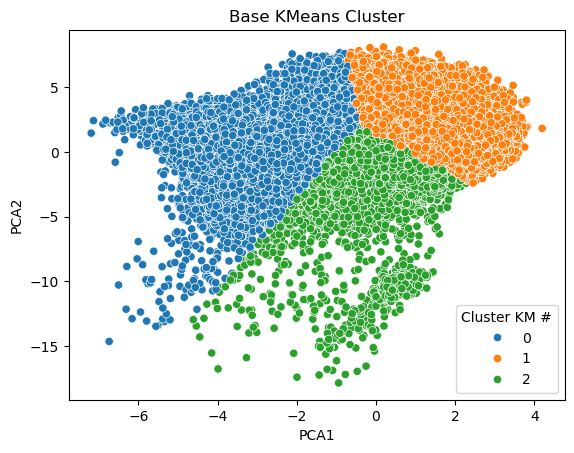

In [20]:
base_Kmean = KMeans(n_clusters = 3)
pca_df['Cluster KM #'] = base_Kmean.fit_predict(X)
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Cluster KM #', palette=sns.color_palette('tab10', n_colors= 15), data =pca_df).set_title("Base KMeans Cluster")

### Let's try and find an optimal amount of clusters using a sample of the data and the silhouette scores

In [21]:
pca_df['Cluster KM #'].value_counts()

Cluster KM #
1    437635
2    373071
0    337414
Name: count, dtype: int64

In [22]:
sample = pca_df.sample(n=10000, random_state=42)
sample['Cluster KM #'].value_counts()

Cluster KM #
1    3824
2    3241
0    2935
Name: count, dtype: int64

In [23]:
klist = np.arange(4,30,1)
s_score = []
for k in klist:
    Kmean = KMeans(n_clusters = k)
    clstr_labels = Kmean.fit_predict(sample[['PCA1', 'PCA2']]) 
    s_score.append(silhouette_score(sample[['PCA1', 'PCA2']] , clstr_labels))

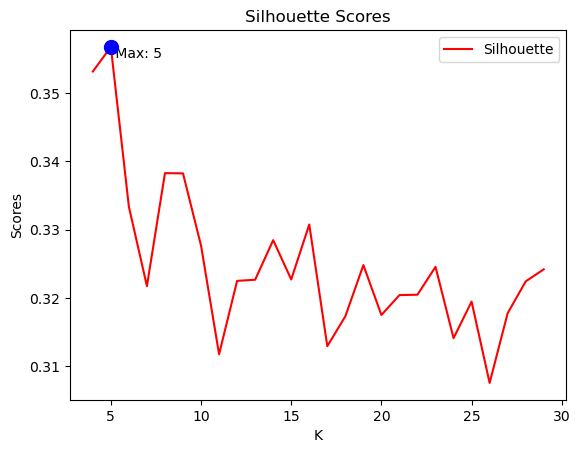

In [24]:
sns.lineplot(x = klist, y = s_score, color = 'r', label='Silhouette')


plt.scatter(klist[s_score.index(max(s_score))], max(s_score), color='blue', s=100, zorder=5) 
plt.text(klist[s_score.index(max(s_score))], max(s_score), f' Max: {klist[s_score.index(max(s_score))]}', verticalalignment='top', horizontalalignment='left', fontsize=10,)

plt.ylabel('Scores')
plt.xlabel('K')
plt.title('Silhouette Scores')
plt.legend()
plt.show()

### Then we plug that amount into the model

Text(0.5, 1.0, 'KMeans Cluster')

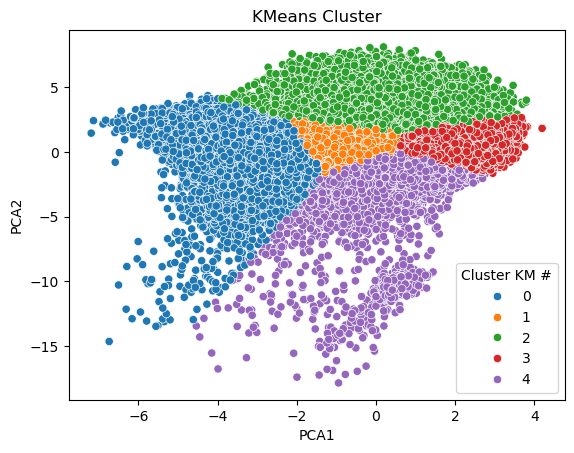

In [25]:
opt_Kmean = KMeans(n_clusters = klist[s_score.index(max(s_score))])
pca_df['Cluster KM #'] = opt_Kmean.fit_predict(X)
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Cluster KM #', palette=sns.color_palette('tab10', n_colors= 15), data =pca_df).set_title("KMeans Cluster")

### Mapping the user's data over the cluster

Text(0.5, 1.0, 'KMeans Cluster With User')

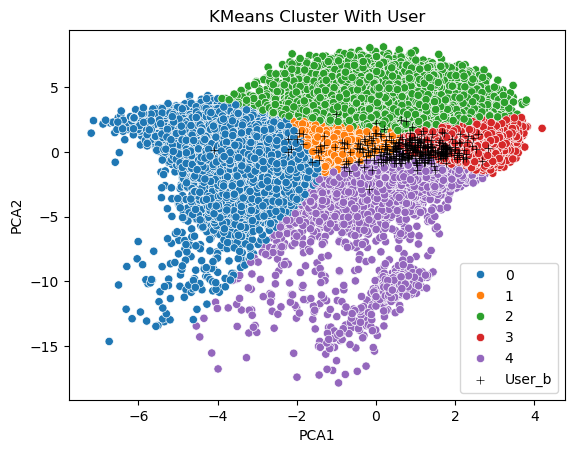

In [26]:
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Cluster KM #', palette=sns.color_palette('tab10', n_colors= 15), data =pca_df)
sns.scatterplot(x = 'PCA1', y = 'PCA2', color='black', data =pca_df[pca_df['id'].isin(df_user_b['Spotify Track Id'])], label='User_b', marker='+').set_title("KMeans Cluster With User")

### Using these cluster we repeat the process

### Let's find how many K-Neighbors we should find from each cluster  

In [27]:
user_b = pca_df[pca_df['id'].isin(df_user_b['Spotify Track Id'])]
non_b =  pca_df[~pca_df['id'].isin(df_user_b['Spotify Track Id'])]
user_b_by_cluster = [user_b[user_b['Cluster KM #'] == i] for i in sorted(user_b['Cluster KM #'].unique())]
non_b_by_cluster = [non_b[non_b['Cluster KM #'] == i] for i in sorted(non_b['Cluster KM #'].unique())]
user_b_percent = [len(df)*len(user_b_by_cluster[i]) / (len(non_b_by_cluster[i]) + len(user_b_by_cluster[i])) for i in range(len(user_b['Cluster KM #'].unique()))]

### The Model

In [28]:
playlist = []
for i in range(len(user_b_by_cluster)):
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(non_b_by_cluster[i][['PCA1','PCA2']])
    playlist.append(model_knn.kneighbors(user_b_by_cluster[i][['PCA1','PCA2']].values.reshape(-1, 2), n_neighbors=math.floor(user_b_percent[i])))

### Find the samllest K-Neighbors proportional to the user’s presence within each cluster.

In [29]:
results = []
i = 0
for p in playlist:
    min_eles = np.sort(p[0])[:math.floor(400*.01*user_b_percent[i])]
    for ele in min_eles:
        results.append(p[1][np.where(p[0] == ele)[0][0] , np.where(p[0] == ele)[1][0]])
    i+=1
results = list(set(results))
len(results)

326

In [30]:
perdicts_km_knn = df.loc[(results)]
perdicts_km_knn.head()

,id,Title,Artist(s),Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,BPM,Time_Signature,Valence,user_b
86019,1eWyJssRdlppy1LVSnu3oX,A Simple Prayer,Jeffrey Gaines,0.863000,0.863000,236467,0.3960,0.00000,4.0,0.9870,-10.070,0.0,0.0547,149.844,3.0,0.4130,False
145434,5oa93vR3eehJHIIa9c4X21,Orange Shadows (Psy Xlarve ),Xlarve,0.064500,0.064500,261744,0.7090,0.65900,8.0,0.0601,-8.581,1.0,0.0425,137.978,4.0,0.6670,False
88091,0fVWfnzRx2IJ7SlZYtCTxK,Never About The Cow,Fudgie & Fufu,0.000672,0.000672,974027,0.8080,0.01210,1.0,0.4610,-8.988,1.0,0.1780,126.555,4.0,0.0958,False
315421,1v7VNXtBr9FnSegzdBtKNy,"Triakontameron, 30 Moods and Scenes in Triple ...","[""['Leopold Godowsky'"", ' "" \'Konstantin Scher...",0.994000,0.994000,156133,0.0361,0.92100,4.0,0.0603,-27.132,1.0,0.0361,74.484,4.0,0.2870,False
51235,1BleDbe6N4T1BL9Ibi4a5N,Ready,Matthew Bertram,0.298000,0.298000,190000,0.3550,0.00267,1.0,0.0775,-9.722,1.0,0.0252,80.012,3.0,0.2720,False


### TA-DA we have a playlist 

## Let's Optimize our Clustering

### Finding the best amount clusters for GMM using BIC  

In [31]:
sample = metrics_ss.sample(n=10000, random_state=42)
b_score = []
for k in klist:
    gmm = GaussianMixture(n_components=k)
    clstr_labels = gmm.fit_predict(sample)
    b_score.append(gmm.bic(sample))

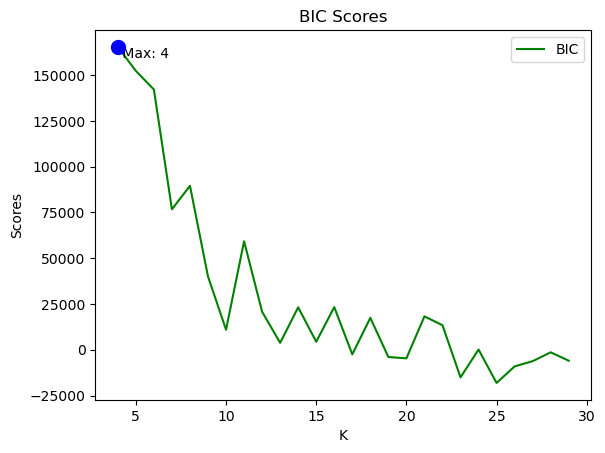

In [32]:
sns.lineplot(x = klist, y = b_score, color = 'g', label='BIC')

plt.scatter(klist[b_score.index(max(b_score))], max(b_score), color='blue', s=100, zorder=5) 
plt.text(klist[b_score.index(max(b_score))], max(b_score), f' Max: {klist[b_score.index(max(b_score))]}', verticalalignment='top', horizontalalignment='left', fontsize=10,)
plt.ylabel('Scores')
plt.xlabel('K')
plt.title('BIC Scores')
plt.legend()
plt.show()

### Plug the best amount in

In [33]:
metric_gmm = GaussianMixture(n_components=klist[b_score.index(max(b_score))])
metrics_ss['Cluster GMM #'] = metric_gmm.fit_predict(X)
metrics_ss['user_b'] = df['user_b']

### Sampling data

In [34]:
user_b = metrics_ss[df['id'].isin(df_user_b['Spotify Track Id'])]
non_b =  metrics_ss[~df['id'].isin(df_user_b['Spotify Track Id'])]
user_b_by_cluster = [user_b[user_b['Cluster GMM #'] == i] for i in sorted(user_b['Cluster GMM #'].unique())]
non_b_by_cluster = [non_b[non_b['Cluster GMM #'] == i] for i in sorted(non_b['Cluster GMM #'].unique())]
user_b_percent = [len(df)*len(user_b_by_cluster[i]) / (len(non_b_by_cluster[i]) + len(user_b_by_cluster[i])) for i in range(len(user_b['Cluster GMM #'].unique()))]
user_b_percent

[445.37026261685867,
 61.108070707133955,
 128.50890775114263,
 456.65316623710754]

### Let's use the clustering to put together Random Forest Classifiers to make a playlist

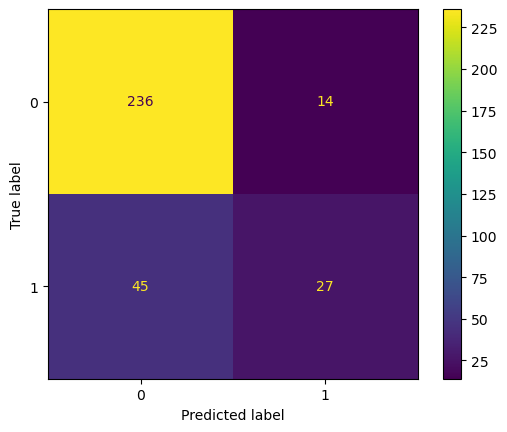

In [35]:
playlist = pd.DataFrame()
cfmat = np.array([[0, 0], [0, 0]])
importances = np.empty(12)
for i in range(len(user_b_by_cluster)):
    rfc_base = RandomForestClassifier(n_estimators = 100)
    sample_pool = pd.concat([metrics_ss[metrics_ss['Cluster GMM #'] == i].sample(n=math.floor(user_b_percent[i]), random_state=42), user_b_by_cluster[i]])\
    .drop_duplicates() 
    X_train, X_test, y_train, y_test = train_test_split(sample_pool.drop(['user_b', 'Cluster GMM #'], axis=1), sample_pool['user_b'], test_size = 0.25, random_state=42)
    rfc_base.fit(X_train, y_train)
    con = confusion_matrix(y_test, rfc_base.predict(X_test))
    X_test['on_list'] = rfc_base.predict(X_test)
    playlist = pd.concat([playlist, X_test[X_test['on_list'] == True]])
    if len(con) > 1: cfmat += con
    importances += np.array(rfc_base.feature_importances_)
importances /= len(user_b_by_cluster)
playlist.drop('on_list', axis=1, inplace=True)
ConfusionMatrixDisplay(cfmat).plot()

### Find the importantance of each feature  

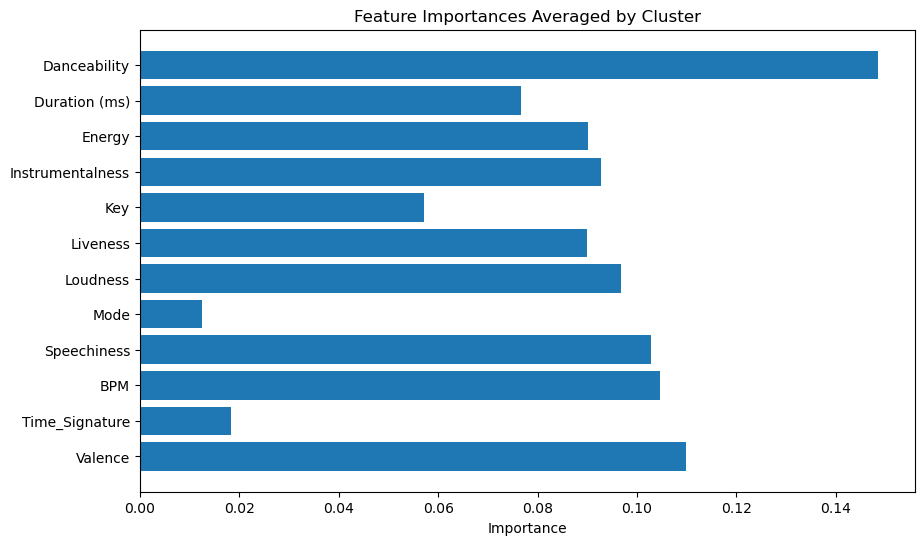

In [36]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), metrics_ss.drop(['user_b', 'Cluster GMM #'], axis=1).columns)
plt.xlabel('Importance')
plt.title('Feature Importances Averaged by Cluster')
plt.gca().invert_yaxis()
plt.show()

### Time_Signature and Key are least important and the most important is Dancebility

In [37]:
perdicts_gmm_dtc = df.loc[(playlist.index)]
perdicts_gmm_dtc = perdicts_gmm_dtc[perdicts_gmm_dtc['user_b'] == False]
perdicts_gmm_dtc

,id,Title,Artist(s),Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,BPM,Time_Signature,Valence,user_b
4123,1CS7Sd1u5tWkstBhpssyjP,Take Me to Church,Hozier,0.6340,0.566,241693,0.664,0.000000,4.0,0.1160,-5.303,0.0,0.0464,128.945,4.0,0.437,False
772697,2ykupyvksLUw3aVFA8zXas,The Ocean,"[""['Corey Mills'"", ' "" \'Sam E.C.""]']",0.5910,0.591,264797,0.752,0.000000,3.0,0.1930,-6.467,0.0,0.0810,120.053,4.0,0.346,False
1090880,25rlxcwMYYeZANPH4lTqeS,Mailbox Money,Jimmy Buffett,0.7390,0.739,259315,0.790,0.000000,7.0,0.1030,-7.682,1.0,0.0378,96.009,4.0,0.793,False
115180,6VsX9dD93XNbJA9MmvZxtk,(Already),57th Street Rogue Dog Villians,0.3090,0.309,210120,0.710,0.000000,1.0,0.0851,-6.874,0.0,0.1710,83.040,4.0,0.741,False
243815,6JshG9ymYsNRxbSPOlmn0e,Got To Have You,Joanna Connor,0.4500,0.450,220173,0.796,0.000047,0.0,0.1010,-5.128,0.0,0.0484,178.133,4.0,0.949,False
2116,2eRmD96ncTEgQwJmXa6rrg,Teardrops,Womack & Womack,0.0876,0.872,228573,0.715,0.070600,11.0,0.1770,-10.182,1.0,0.0468,133.225,4.0,0.967,False
1000901,3OLgXqCdoP4WLBzRyC4Kb8,The Cat Trapped in the Wall,Elf Power,0.5960,0.596,193992,0.589,0.044700,7.0,0.1380,-7.098,1.0,0.0274,113.978,4.0,0.869,False
1012837,0kJVKOA2GhBM96hs3XnuUS,若是你在我身邊,劉文正,0.7450,0.745,222813,0.640,0.000000,7.0,0.6050,-10.245,1.0,0.0690,130.889,4.0,0.689,False
138426,2nNIEHHnL5QhKBPQ0CBN5E,High Priest,Shai Linne,0.5390,0.539,272692,0.707,0.014800,5.0,0.2400,-4.171,0.0,0.2530,90.082,4.0,0.936,False
611562,0EkQOs7aPMdYA6VqeKuQbj,El Que a Hierro Mata,Hilario Duran,0.7010,0.701,305400,0.705,0.000615,2.0,0.2700,-9.060,1.0,0.0353,104.809,4.0,0.934,False


### TA-DA we have a playlist 

### Finding the best amount clusters for KMeans using Silhouette Score

In [38]:
s_score = []
for k in klist:
    Kmean = KMeans(n_clusters = k)
    clstr_labels = Kmean.fit_predict(sample)
    s_score.append(silhouette_score(sample,clstr_labels))

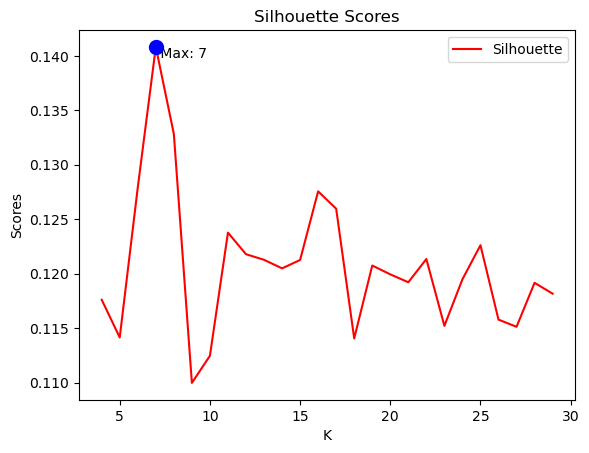

In [39]:
sns.lineplot(x = klist, y = s_score, color = 'r', label='Silhouette')


plt.scatter(klist[s_score.index(max(s_score))], max(s_score), color='blue', s=100, zorder=5) 
plt.text(klist[s_score.index(max(s_score))], max(s_score), f' Max: {klist[s_score.index(max(s_score))]}', verticalalignment='top', horizontalalignment='left', fontsize=10,)

plt.ylabel('Scores')
plt.xlabel('K')
plt.title('Silhouette Scores')
plt.legend()
plt.show()

### Plug it in to the model

In [40]:
metric_km = KMeans(n_clusters=klist[s_score.index(max(s_score))])

metrics_ss['Cluster KM #'] = metric_km.fit_predict(X)

### Sampling data

In [41]:
user_b = metrics_ss[df['id'].isin(df_user_b['Spotify Track Id'])]
non_b =  metrics_ss[~df['id'].isin(df_user_b['Spotify Track Id'])]
user_b_by_cluster = [user_b[user_b['Cluster KM #'] == i] for i in sorted(user_b['Cluster KM #'].unique())]
non_b_by_cluster = [non_b[non_b['Cluster KM #'] == i] for i in sorted(non_b['Cluster KM #'].unique())]
user_b_percent = [len(df)*len(user_b_by_cluster[i]) / (len(non_b_by_cluster[i]) + len(user_b_by_cluster[i])) for i in range(len(user_b['Cluster KM #'].unique()))]
user_b_percent

[607.8495077638607,
 14.197282024014147,
 178.76806178375685,
 511.95616854448485,
 106.70326334116072,
 416.95568734590523,
 111.06897552481378]

### Let's use the clustering to put together Random Forest Classifiers to make a playlist

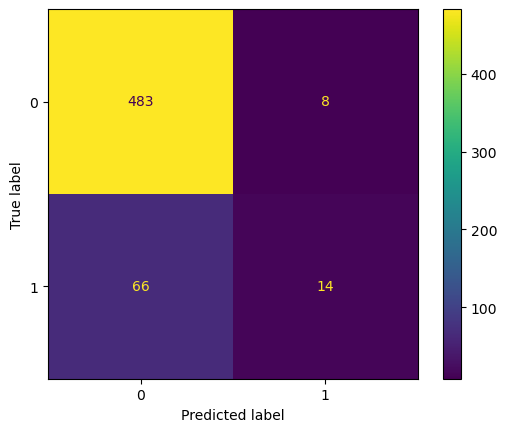

In [42]:
playlist = pd.DataFrame()
cfmat = np.array([[0, 0], [0, 0]])
importances = np.empty(12)
for i in range(len(user_b_by_cluster)):
    rfc_base = RandomForestClassifier(n_estimators = 100)
    sample_pool = pd.concat([metrics_ss[metrics_ss['Cluster KM #'] == i].sample(n=math.floor(user_b_percent[i]), random_state=42), user_b_by_cluster[i]])\
    .drop_duplicates() 
    X_train, X_test, y_train, y_test = train_test_split(sample_pool.drop(['user_b', 'Cluster KM #', 'Cluster GMM #'], axis=1), sample_pool['user_b'], test_size = 0.25, random_state=42)
    rfc_base.fit(X_train, y_train)
    con = confusion_matrix(y_test, rfc_base.predict(X_test))
    X_test['on_list'] = rfc_base.predict(X_test)
    playlist = pd.concat([playlist, X_test[X_test['on_list'] == True]])
    if len(con) > 1: cfmat += con
    importances += np.array(rfc_base.feature_importances_)
importances /= len(user_b_by_cluster)
playlist.drop('on_list', axis=1, inplace=True)
ConfusionMatrixDisplay(cfmat).plot()

### Find the importantance of each feature  

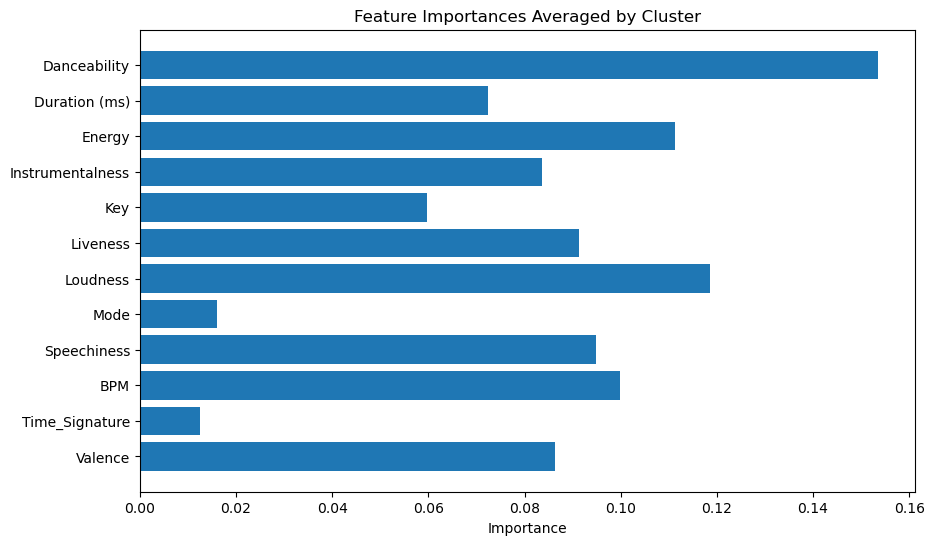

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), metrics_ss.drop(['user_b', 'Cluster KM #', 'Cluster GMM #'], axis=1).columns)
plt.xlabel('Importance')
plt.title('Feature Importances Averaged by Cluster')
plt.gca().invert_yaxis()
plt.show()

### Time_Signature and Key are least important and the most important is Dancebility

In [44]:
perdicts_km_dtc = df.loc[(playlist.index)]
perdicts_km_dtc = perdicts_km_dtc[perdicts_km_dtc['user_b'] == False]
perdicts_km_dtc

,id,Title,Artist(s),Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,BPM,Time_Signature,Valence,user_b
793580,1HPKX7Utv4kjkOmRndl1iI,Alouette,Melinda Caroll,0.638,0.638,141160,0.700,0.000000,2.0,0.0773,-3.458,1.0,0.0357,140.133,4.0,0.818,False
411779,2E68SBc2jKBzolARrefe4X,Put A Wiggle In It,Rose City Kings,0.586,0.586,238600,0.811,0.000016,9.0,0.2050,-3.307,1.0,0.1450,130.002,4.0,0.808,False
168101,6xLRzthUUaf93bWYvwHcSI,My Mind,M.M.M.F.D.,0.594,0.594,201000,0.932,0.000000,7.0,0.2130,-3.745,0.0,0.1200,99.910,4.0,0.754,False
947315,2B0u1b2clwMsApSDy90pJC,Everything Is Beautiful,Marcella Puppini,0.736,0.736,214966,0.684,0.000000,5.0,0.1530,-5.153,1.0,0.0447,112.041,4.0,0.403,False
357350,1scWqO5mHhUy7ja2RIj8Va,Warships [live at Tower Theater],Mosley Wotta,0.550,0.550,331655,0.746,0.000003,11.0,0.1150,-6.653,0.0,0.1830,88.356,4.0,0.767,False
865826,6nZID1p0ZbG6XR6y0VVdCK,No Te Pertenece,Noel Schajris,0.344,0.344,250227,0.587,0.000000,7.0,0.2490,-4.461,1.0,0.0528,143.947,4.0,0.440,False
225504,7nBvezUZxkBCcQghTWWoIL,Tebo,Achigo Band,0.619,0.619,327720,0.915,0.000105,7.0,0.0807,-2.047,1.0,0.0468,106.958,4.0,0.870,False
820572,252BC3X6Os9bpIBWu7kvDJ,Good Old Days,Danny Roberts,0.676,0.676,197440,0.683,0.009520,1.0,0.2510,-7.361,0.0,0.0396,174.996,4.0,0.834,False


### TA-DA we have a playlist 

# Summary 

## K-neighbors
   - Able to get a nice amount of recommendations
   - Unable to find out base of what due to PCA

## Random Forest Classifier
   - Hard to get recommendation with a small user data set
   - We can see how it learns
   
## What's next
   - Testing via users and getting feedback
   - Get a hardware to that was hyper parametrize
   - Using two user’s input of like songs, can we recommend a list that both users will regardless of size.